<a href="https://colab.research.google.com/github/ViniFogliarini/dnc_python/blob/main/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESAFIO VINICIUS FOGLIARINI


### Importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

%pip install plotly
%pip install cufflinks
%pip install chart-studio

import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Criando nossos DataFrames

In [ ]:
df_mkt = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/MKT.csv', sep = ',')

### Análise Descritiva - Conhecendo Nossos Dados

In [ ]:
df_mkt.head()
# Números ok, com duas casas decimais

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df_mkt.info()
# Sem valores nulos, Dtype ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
df_mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
fig = px.box(df_mkt, x='sales')
fig.update_traces(line_color = 'blue')

In [ ]:
df_mkt.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

### Tratando os Dados

In [ ]:
# Ajustando nome das colunas
df_mkt = df_mkt.rename(columns = {'youtube':'YouTube', 'facebook':'Facebook', 'newspaper':'Newspaper', 'sales':'Sales'})
df_mkt.head()

# Vamos manter todas as colunas

,YouTube,Facebook,Newspaper,Sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df_mkt.columns

Index(['YouTube', 'Facebook', 'Newspaper', 'Sales'], dtype='object')

### Análise Exploratória

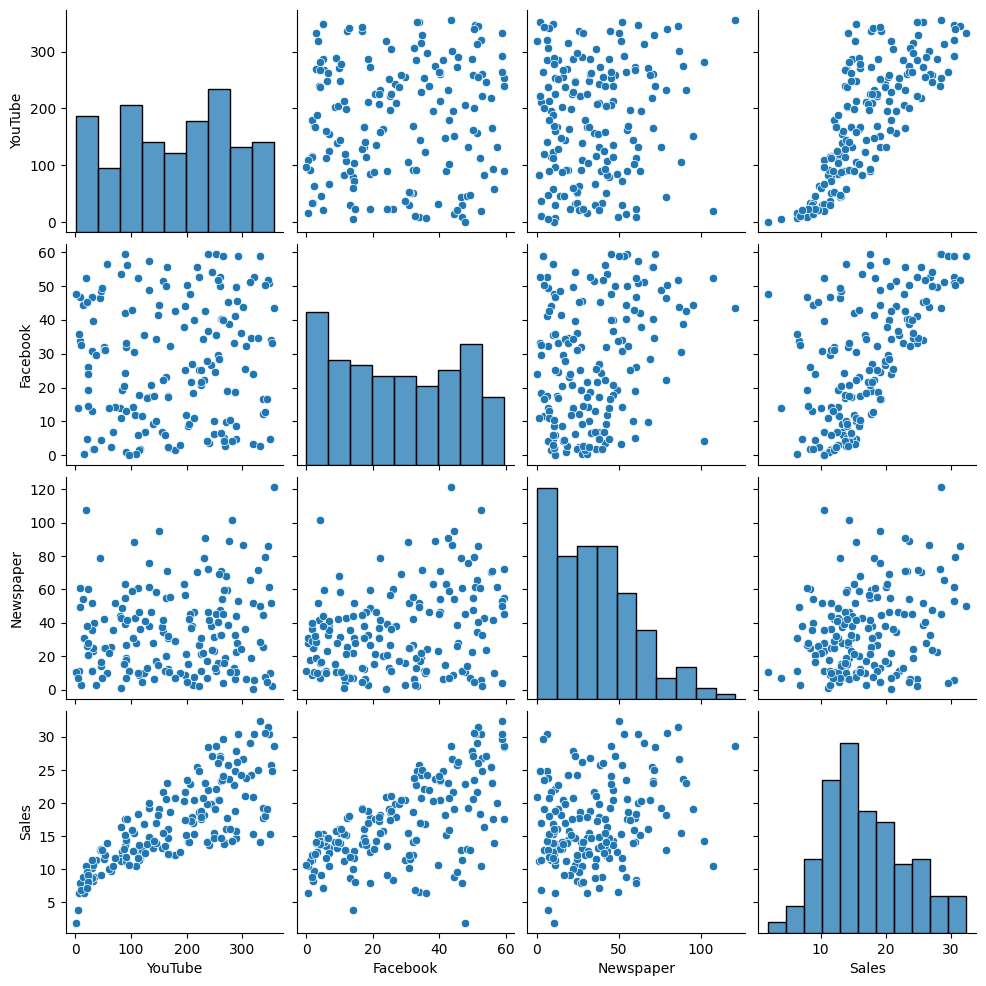

In [ ]:
sns.pairplot(df_mkt)

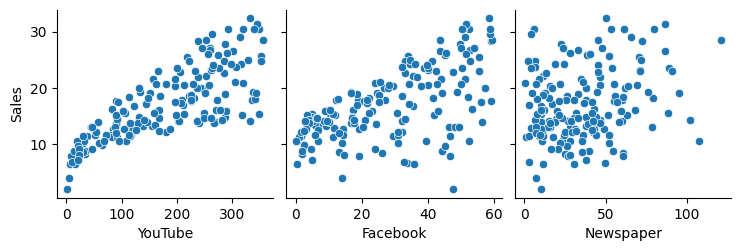

In [ ]:
# Comparação Vendas x Canal de Divulgação

sns.pairplot(df_mkt, x_vars = ['YouTube', 'Facebook', 'Newspaper'], y_vars = 'Sales')

In [ ]:
# Quanto maior o investimento no YouTube maior o número de vendas
# Quanto maior o investimento no Facebook maior o número de vendas
# Ja no canal Newspaper temos grandes números de vendas mesmo com um investimento menor e quanto menor o investimento mais concentrado o número de vendas

In [ ]:
# CORRELAÇÕES
df_mkt.corr()

,YouTube,Facebook,Newspaper,Sales
YouTube,1.000000,0.086538,0.110759,0.782030
Facebook,0.086538,1.000000,0.293425,0.602918
Newspaper,0.110759,0.293425,1.000000,0.254987
Sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

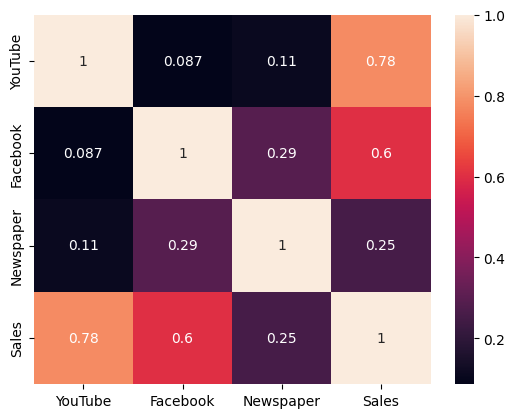

In [ ]:
sns.heatmap(df_mkt.corr(), annot=True)

In [ ]:
# Youtube tem a maior correlação com as vendas seguido pelo Facebook, os dois canais tem bons números

<Axes: xlabel='YouTube', ylabel='Count'>

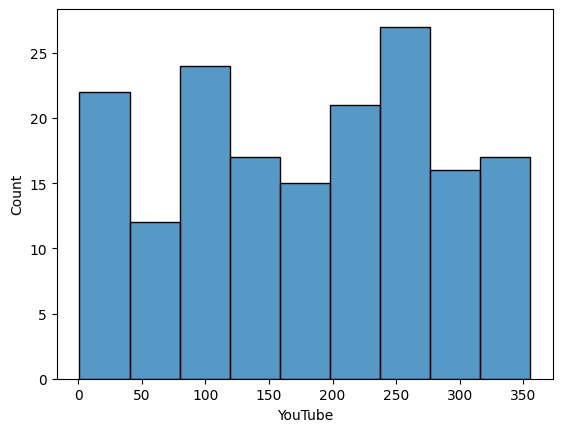

In [ ]:
sns.histplot(df_mkt['YouTube'])

<Axes: xlabel='Facebook', ylabel='Count'>

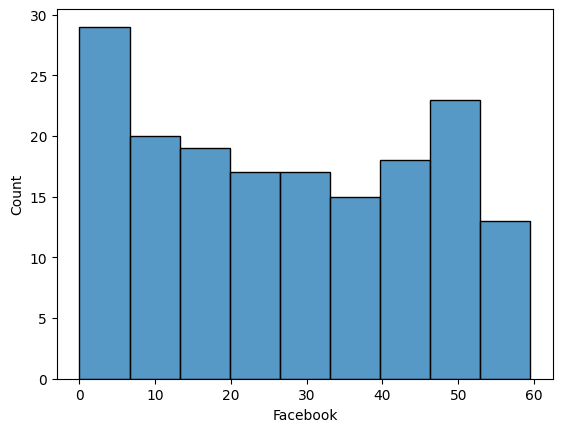

In [ ]:
sns.histplot(df_mkt['Facebook'])

<Axes: xlabel='Sales', ylabel='Count'>

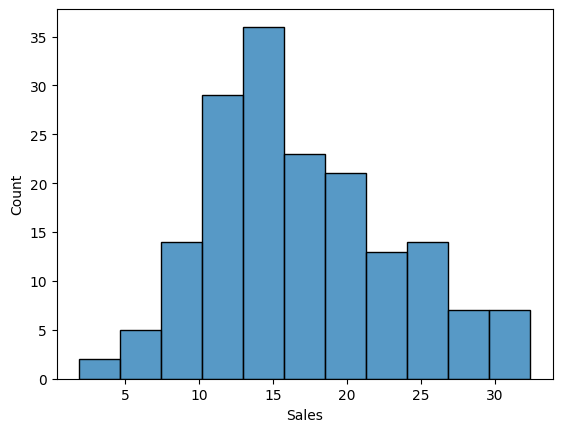

In [ ]:
sns.histplot(df_mkt['Sales'])

### Modelagem

In [ ]:
df_mkt.columns

Index(['YouTube', 'Facebook', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
# Separando as varivais x (explicativas) e y
x = df_mkt[['YouTube', 'Facebook', 'Newspaper']]
y = df_mkt[['Sales']]

In [ ]:
# importando bibliotecas necessárias para testar e treinar o modelo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 42)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


### Treinando o Modelo

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)
print(r)

0.882423505618885


### Predição

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales')

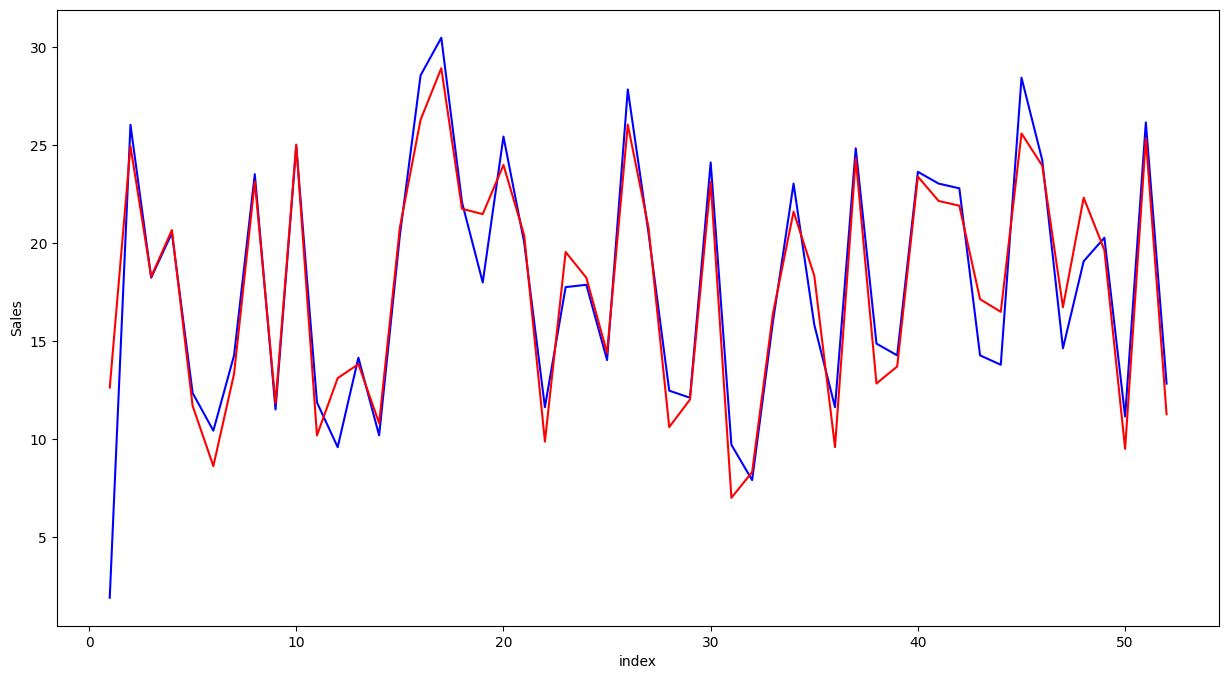

In [ ]:
c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize=(15,8))
plt.plot(c, y_test, color = 'blue')
plt.plot(c, y_pred, color = 'red')
plt.xlabel('index')
plt.ylabel('Sales')

### Calculando as Predições

In [ ]:
df_mkt.head()

,YouTube,Facebook,Newspaper,Sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df_mkt.columns

Index(['YouTube', 'Facebook', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
# Premissas - ajustar valor após o sinal =

YouTube = 85
Facebook = 19
Newspaper = 50

entrada = [[YouTube, Facebook, Newspaper]]

lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([11.0759819])